In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Baby name data URL
url1 = 'https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv'
#Whitehouse API endpoint in JSON
url2 = 'https://opendata.socrata.com/resource/vedg-c5sb.json'
data1 = pd.read_csv(url1)
data2 = pd.read_json(url2)

In [3]:
print("Baby names dataset contains", data1.shape[0], "rows and", data1.shape[1], "columns.")
print("Whitehouse dataset contains", data2.shape[0], "rows and", data2.shape[1], "columns.")

Baby names dataset contains 258000 rows and 4 columns.
Whitehouse dataset contains 469 rows and 5 columns.


In [4]:
data1.head()

,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy


In [5]:
#Descriptive stats for baby names data
data1.describe()

,year,percent
count,258000.000000,258000.000000
mean,1944.000000,0.000894
std,37.238046,0.003016
min,1880.000000,0.000026
25%,1912.000000,0.000081
50%,1944.000000,0.000164
75%,1976.000000,0.000507
max,2008.000000,0.081541


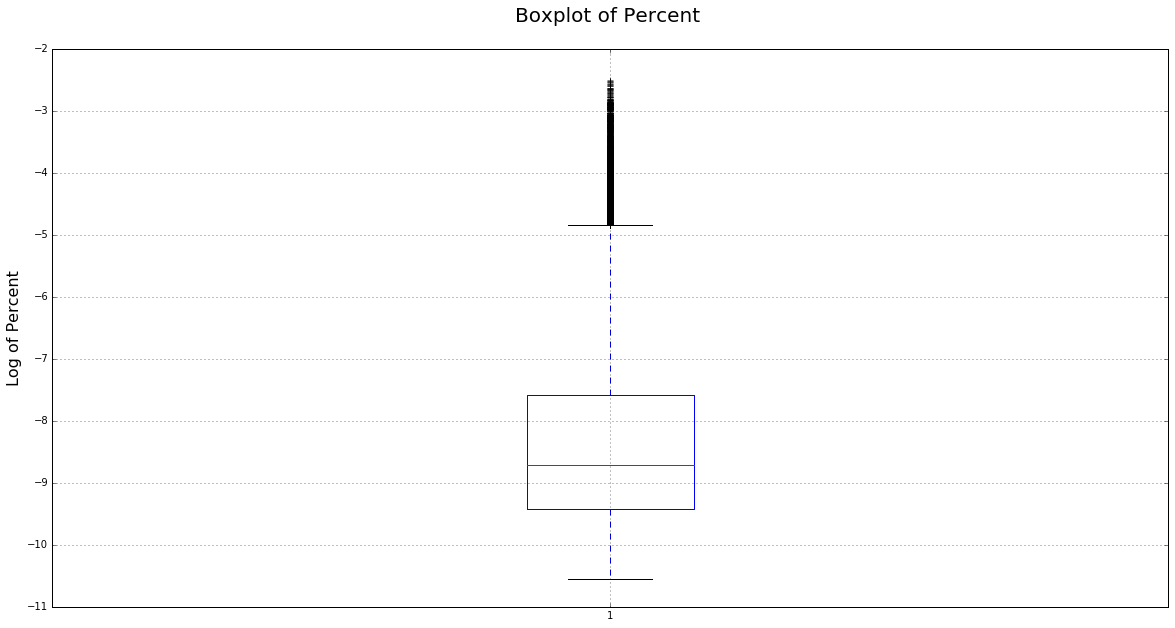

In [17]:
plt.figure(figsize=(20,10))
plt.boxplot(np.log(data1['percent']))
plt.grid(True)
plt.title('Boxplot of Percent \n', fontsize=20)
plt.ylabel('Log of Percent', fontsize=16)

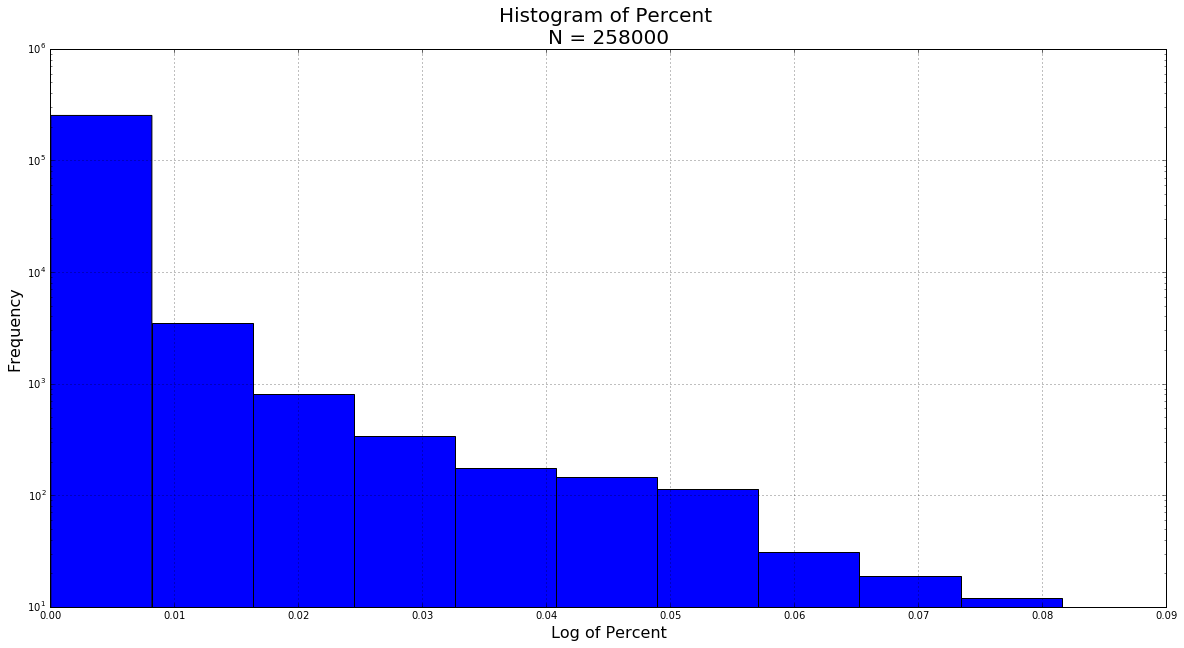

In [18]:
plt.figure(figsize=(20,10))
plt.hist(data1['percent'], log=True)
plt.grid(True)
plt.title('Histogram of Percent \nN = {}'.format(len(data1['percent'])), fontsize=20)
plt.xlabel('Log of Percent', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [8]:
#Check for nulls
data1.isnull().any()

year       False
name       False
percent    False
sex        False
dtype: bool

In [9]:
#Print the starting and ending years and the total number of years
print("Starting year:",data1['year'].min(),"Ending year:",data1['year'].max(),"\nTotal Years:",len(data1['year'].unique()))

Starting year: 1880 Ending year: 2008 
Total Years: 129


In [10]:
#Print number of unique names in data
print("There are", len(data1['name'].unique()), "unique names.")

There are 6782 unique names.


In [11]:
#Check to see if each year contains the same number of names
data1.groupby(['year'])['name'].count().unique()

array([2000], dtype=int64)

In [12]:
data2.head()

,employee_name,employee_status,pay_basis,position_title,salary
0,"Zichal, Heather R.",Employee,Per Annum,DEPUTY ASSISTANT TO THE PRESIDENT FOR ENERGY A...,100000
1,"Zelman, Allison L.",Employee,Per Annum,POLICY ASSISTANT,50000
2,"Young, Latoya A.",Employee,Per Annum,RECORDS MANAGEMENT ANALYST,58511
3,"Young, Katherine H.",Employee,Per Annum,STAFF ASSISTANT,42000
4,"Young, Jr., Reginald D.",Employee,Per Annum,RECORDS MANAGEMENT ANALYST,60232


In [13]:
#Descriptive stats for Whitehouse data
data2.describe()

,salary
count,469.000000
mean,82721.336887
std,41589.433381
min,0.000000
25%,45900.000000
50%,66300.000000
75%,113000.000000
max,179700.000000


Interestingly from the describe at least one of the minimum salaries is 0. 

In [14]:
#Employees that have a reported salary of $0.00
data2[data2.salary == 0]

,employee_name,employee_status,pay_basis,position_title,salary
7,"Wong, Shale L.",Employee,Per Annum,POLICY ADVISOR,0
191,"McGinnis, Patricia G.",Employee,Per Annum,ADVISOR,0
402,"Chen, Margaret C.",Employee,Per Annum,SPECIAL ASSISTANT,0


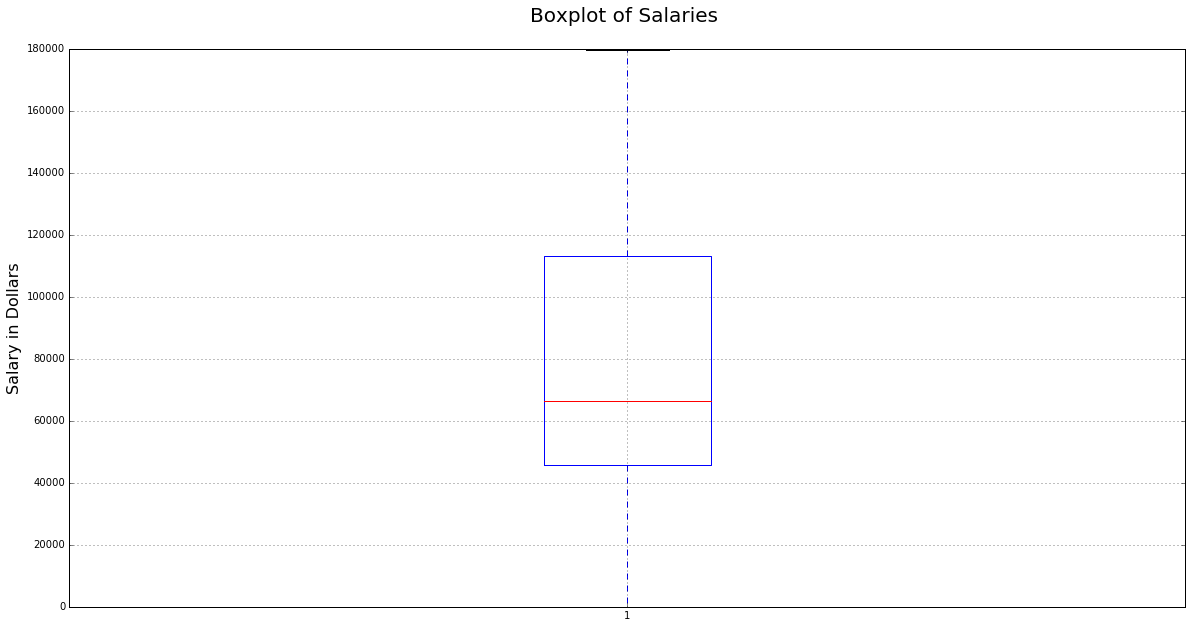

In [16]:
#Box plot of all salaries
plt.figure(figsize=(20,10))
plt.boxplot(data2['salary'])
plt.grid(True)
plt.title('Boxplot of Salaries \n', fontsize=20)
plt.ylabel('Salary in Dollars', fontsize=16)

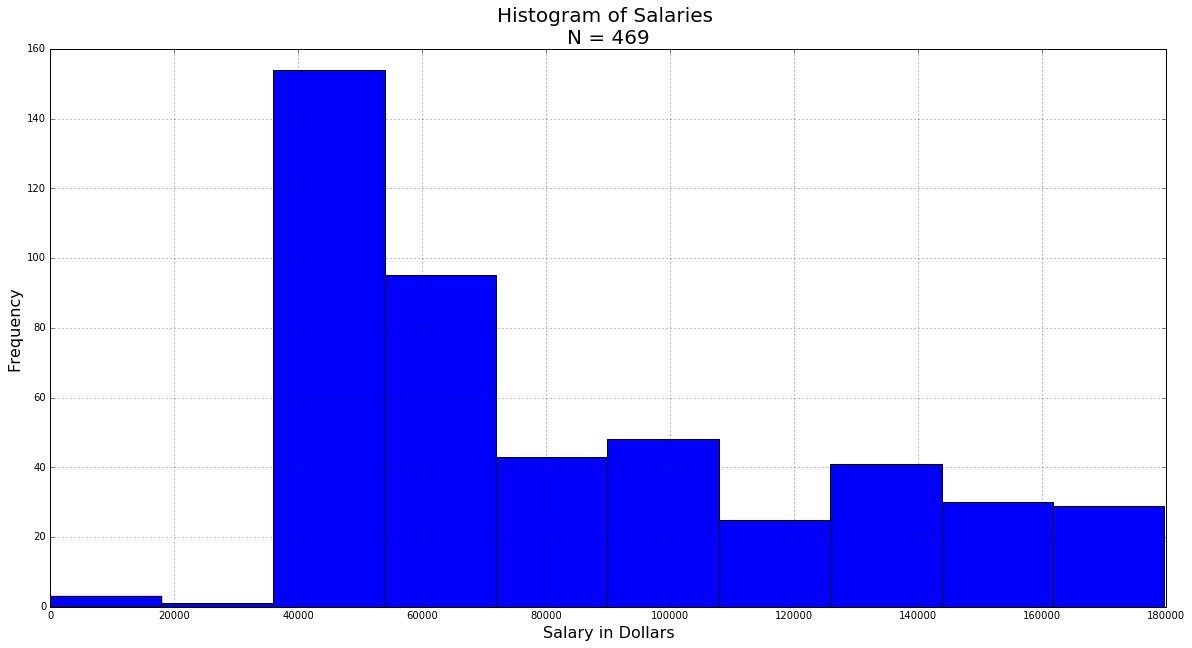

In [20]:
#Histogram of all salaries
plt.figure(figsize=(20,10))
plt.hist(data2['salary'])
plt.grid(True)
plt.title('Histogram of Salaries \nN = {}'.format(len(data2['salary'])), fontsize=20)
plt.xlabel('Salary in Dollars', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [21]:
#Check for nulls
data2.isnull().any()

employee_name      False
employee_status    False
pay_basis          False
position_title     False
salary             False
dtype: bool

Since we want to merge these two datasets on employee_name and infer the gender from the first names in the baby names data, we need to truncate employee names to only first names. We could also use str.find or isin, but that would also connect last names.

In [22]:
#Return data2 using only first names
data2['employee_name'] = data2['employee_name'].str.extract(".+,\s(\w+)", expand = True)

#Check to see if our extract method worked as expected
data2.head()

,employee_name,employee_status,pay_basis,position_title,salary
0,Heather,Employee,Per Annum,DEPUTY ASSISTANT TO THE PRESIDENT FOR ENERGY A...,100000
1,Allison,Employee,Per Annum,POLICY ASSISTANT,50000
2,Latoya,Employee,Per Annum,RECORDS MANAGEMENT ANALYST,58511
3,Katherine,Employee,Per Annum,STAFF ASSISTANT,42000
4,Reginald,Employee,Per Annum,RECORDS MANAGEMENT ANALYST,60232


Not every name in the Whitehouse data is in the baby names data, this creates an interesting challenge in figuring out how to classify the genders. Since the Whitehouse data set is small and 44 names will not be labeled which represents almost 10 percent of the data, I am going to impute. Best practice would be to talk to product owner or SME and discuss how to move forward, but for the purposes of this exercise I am going to do some imputing and assign genders based on some googling. 

In [23]:
#Create dataframe of names that are present in Whitehouse data but not baby names
names = pd.DataFrame(np.setdiff1d(data2['employee_name'],data1['name']))

#Assign genders
names['Gender'] = ['male','male','male','female','female','male','female','female','female','female',
                   'female','female','male','male','male','female','female','female','male','female',
                  'female','female','female','female','male','female','male','male','female','female',
                  'female','female','female','female','female','male','male','male','female','female',
                  'male','male','male','female']
#Rename column
names.rename(columns={0:'Name'}, inplace=True)

names.head()

,Name,Gender
0,Anand,male
1,Andrei,male
2,Araz,male
3,Astri,female
4,Avra,female


In [24]:
#Check that only two genders have been assigned
names['Gender'].unique()

array(['male', 'female'], dtype=object)

In [25]:
#Group name and sex together while summing up the percents
genders = data1.groupby(['name','sex'],as_index = False)[['percent']].sum()

#Take the higher percentage for each name and assign it the respective sex
genders = genders.groupby('name', as_index = False).apply(lambda x: x.max())

#Rename columns
genders.rename(columns={'name':'Name', 'sex':'Gender'}, inplace = True)

#Replace boy with male and girl with female
genders.replace({'boy': 'male', 'girl':'female'}, inplace = True)

genders.head()

,Name,Gender,percent
0,Aaden,male,0.000442
1,Aaliyah,female,0.019748
2,Aarav,male,0.000101
3,Aaron,female,0.292292
4,Ab,male,0.000218


In [26]:
#Concatenate names df with genders df
frames = [names,genders]
names_clean = pd.concat(frames)

names_clean.head()

,Gender,Name,percent
0,male,Anand,NaN
1,male,Andrei,NaN
2,male,Araz,NaN
3,female,Astri,NaN
4,female,Avra,NaN


In [27]:
#Merge the Whitehouse data with our clean names data
data_final = pd.merge(data2,names_clean[['Name','Gender']],left_on='employee_name',right_on='Name',how='left')

data_final.head()

,employee_name,employee_status,pay_basis,position_title,salary,Name,Gender
0,Heather,Employee,Per Annum,DEPUTY ASSISTANT TO THE PRESIDENT FOR ENERGY A...,100000,Heather,female
1,Allison,Employee,Per Annum,POLICY ASSISTANT,50000,Allison,female
2,Latoya,Employee,Per Annum,RECORDS MANAGEMENT ANALYST,58511,Latoya,female
3,Katherine,Employee,Per Annum,STAFF ASSISTANT,42000,Katherine,female
4,Reginald,Employee,Per Annum,RECORDS MANAGEMENT ANALYST,60232,Reginald,male


In [77]:
data_final['Gender'].value_counts()

female    365
male      104
Name: Gender, dtype: int64

In [28]:
#Create female mask where salary greater than 0 and employee status equals employee
female_mask = data_final.loc[(data_final['Gender'] == 'female') & (data_final['salary'] > 0) 
                             & (data_final['employee_status'] == 'Employee')]

#Reindex female_mask
female_mask = female_mask.reset_index(drop = True)

#Create male mask where salary greater than 0 and employee status equals employee
male_mask = data_final.loc[(data_final['Gender'] == 'male') & (data_final['salary'] > 0) 
                           & (data_final['employee_status'] == 'Employee')]

#Reindex male_mask
male_mask = male_mask.reset_index(drop = True)

In [35]:
female_mask.describe()

,salary
count,337.000000
mean,81471.086053
std,40615.189099
min,37826.000000
25%,45900.000000
50%,66300.000000
75%,110000.000000
max,172200.000000


In [36]:
male_mask.describe()

,salary
count,97.000000
mean,77641.731959
std,38600.993113
min,42000.000000
25%,45000.000000
50%,61200.000000
75%,100000.000000
max,172200.000000


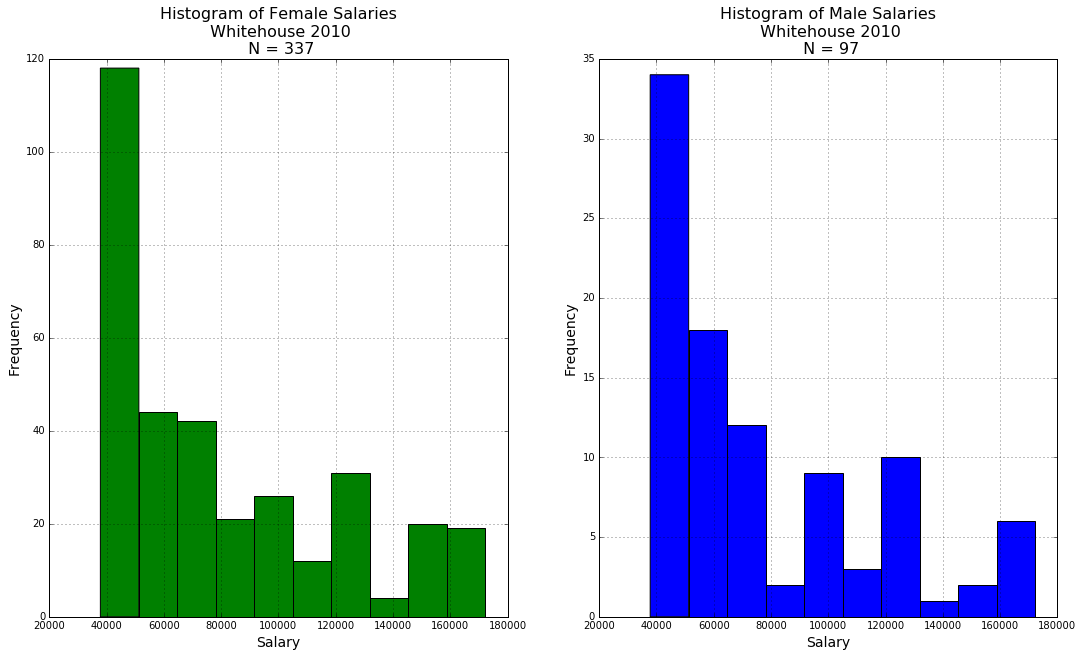

In [79]:
#Plot histograms
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.hist(female_mask['salary'], color = "Green")
plt.grid(True)
plt.title('Histogram of Female Salaries\n Whitehouse 2010\n N = {}'.format(len(female_mask['salary'])), fontsize=16)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.subplot(122)
plt.hist(male_mask['salary'], range=(female_mask['salary'].min(),male_mask['salary'].max()))
plt.grid(True)
plt.title('Histogram of Male Salaries\n Whitehouse 2010\n N = {}'.format(len(male_mask['salary'])), fontsize=16)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.subplots_adjust(left=0.2,wspace=0.2)
plt.savefig('C:/Users/Josh/Desktop/Salary_Hist.png')

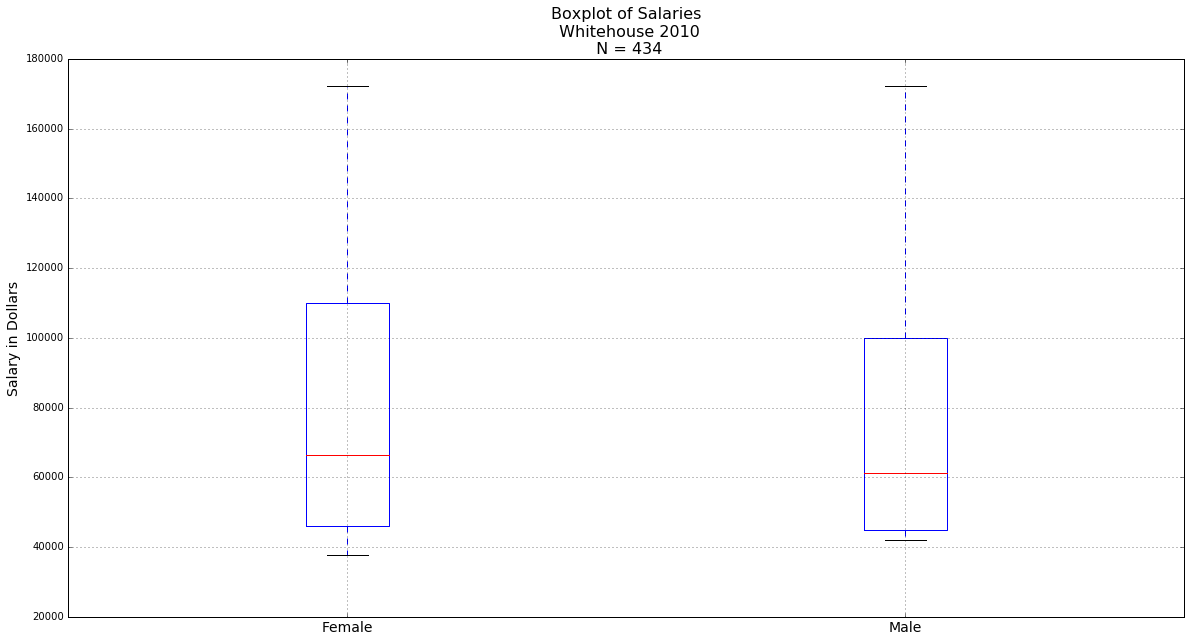

In [84]:
#Plot box plots
plt.figure(figsize=(20,10))
plt.boxplot([female_mask['salary'], male_mask['salary']])
plt.grid(True)
plt.title('Boxplot of Salaries\n Whitehouse 2010\n N = {}'.format(len(female_mask) + len(male_mask)), fontsize=16)
plt.ylabel('Salary in Dollars', fontsize=14)
plt.xticks([1,2], ['Female','Male'], fontsize=14)
plt.savefig('C:/Users/Josh/Desktop/Salary_Box.png')

In [179]:
data_final.to_csv('C:/Users/Josh/Desktop/MITRE_Final.csv')

In [81]:
len(female_mask) + len(male_mask)

434